**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [7]:
import numpy as np
import pandas as pd#my!
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [123]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=2, algorithm='brute'):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = np.copy(X)
        self.y = np.copy(y)
        self.classes = np.unique(y)
        self.classes = np.sort(self.classes)
        self.y = np.searchsorted(self.classes, self.y)

    def predict(self, X):
        y = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            dif = np.copy(self.X)
            dist = np.sum(np.square(dif - X[i]), axis=1)
            ind = np.argsort(dist)
            for j in range(self.n_neighbors):
                y[i] += self.y[ind[j]]
            y[i] = int(round(y[i] / self.n_neighbors))
        return y

    def predict_proba(self, X):
        y = np.zeros((X.shape[0], self.classes.size))
        for i in range(X.shape[0]):
            dif = np.copy(self.X)
            dist = np.sum(np.square(dif - X[i]), axis=1)
            ind = np.argsort(dist)
            for j in range(self.n_neighbors):
                y[i][self.y[ind[j]]] += 1. / self.n_neighbors
        return y

    def score(self, X, y):
        y1 = self.predict(X)
        y1 = np.equal(y1, y)
        z = np.sum(y1) / y.size
        return z

43:1: W391 blank line at end of file


**IRIS**

In [110]:
iris = datasets.load_iris()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [148]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [149]:
%time clf.fit(X_train, y_train)

CPU times: user 899 µs, sys: 124 µs, total: 1.02 ms
Wall time: 673 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [150]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.02 ms, sys: 142 µs, total: 1.16 ms
Wall time: 726 µs


In [151]:
%time clf.predict(X_test)

CPU times: user 6.25 ms, sys: 0 ns, total: 6.25 ms
Wall time: 3.9 ms


array([2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1])

In [152]:
%time my_clf.predict(X_test)

CPU times: user 6.09 ms, sys: 263 µs, total: 6.35 ms
Wall time: 4.23 ms


array([2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1])

In [153]:
%time clf.predict_proba(X_test)

CPU times: user 4.44 ms, sys: 609 µs, total: 5.05 ms
Wall time: 3.04 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [154]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 1.75 ms, total: 1.75 ms
Wall time: 1.01 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [155]:
clf.score(X_test, y_test)

0.9333333333333333

In [156]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

18

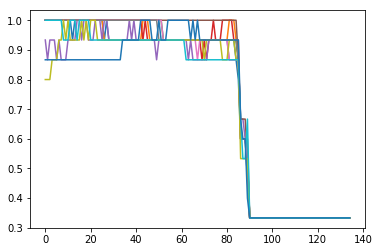

In [200]:
#%%pycodestyle
score = np.ones(y_train.size)
best = 0
while np.sum(score) > 0:
    tmp = np.nonzero(score)
    best = tmp[0][0]
    X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                        iris.target,
                                                        test_size=0.1,
                                                        stratify=iris.target)
    y = np.zeros(y_train.size)
    for i in range(y_train.size):
        my_clf = MyKNeighborsClassifier(n_neighbors=i+1, algorithm='brute')
        my_clf.fit(X_train, y_train)
        y[i] = my_clf.score(X_test, y_test)
        if y[i] != 1:
            score[i] = 0
    plt.plot(y)
best

**MNIST**

In [ ]:
mnist = fetch_mldata('MNIST original')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 4

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin